# EC_01_Volcanic_activity_detection_and_noise_characterization_using_machine learning 


## Author(s)


- Author1 = {"name": "Myles Mason", "affiliation": "student", "email": "mylesm18@vt.edu", "orcid": "orcid"}
- Author2 = {"name": "Dr.Wenskovitch", "affiliation": "affiliation", "email": "jw87@vt.edu", "orcid": "orcid"}
- Author3 = {"name": "Dr.Sarah Stamps", "affiliation": "Professor", "email": "dstamps@vt.edu", "orcid": "orcid"}
- Author4 = {"name": "Dr.Jones", "affiliation": "Professor", "email": "joshj55@vt.edu", "orcid": "orcid"}

    

## Purpose

This Jupyter notebook aims to explore methods towards characterizing noise and eventually predicting volcanic activity for Ol Doinyo Lengai (a volcano in Tanzania) with machine learning. Machine learning is a powerful tool that enables the automatization of complex mathematical and analytical models. In the case of this Jupyter notebook, the components are height, latitude, and longitude. The predicted component values are the next heights. This project uses Global Navigation Satellite System  (GNSS) data from the EarthCube CHORDS portal TZVOLCANO, which is the online interface for obtaining open-access real-time positioning data collected around Ol Doinyo Lengai (http://tzvolcano.chordsrt.com).

## Technical contributions
- The training of the models and anaylze uses basic Linear Albera and stastics 
- The main libraries used (numpy and pandas) are both libraries for data manipulation and linear algebra 
- The CHORDS site linked above is the location of the data and the interface of CHORDS

## Methodology
The data being anaylzed is from the first station labled as OLO1. The two JSON imports for the data are from 12/06/2020 and 04/16/2021. These specific days were choosen because the date seperation is four months which allows for variation in the data. 
#Say that I went throgh data pre processing steps , did basic exploration to see if LR models could be used went to bigger data sets to see if they were usable so it leads up to me to talk about results site

## Results
Describe and comment on the most important results. Include images and URLs as necessary. 

## Funding

- Award1 = {"agency": "National Science Foundation EarthCube Program", "award_code": "1639554", "award_URL": "https://www.nsf.gov/awardsearch/showAward?AWD_ID=1639554&HistoricalAwards=false"}
- Award2 = {"agency": "Virginia Tech Academy of Integrated Sciences Hamlett Undergraduate Research Award", "award_code": "44672", "award_URL": "award_URL"}

## Keywords
Include up to 5 keywords, using the template below.

keywords=["tzDF", "LinearRegression", "Concat", "JSON", "Model"]

## Citation
Include recommended citation for the notebook.
#cite machine learning

## Work In Progress - improvements
Use this section only if the notebook is not final.
# mention things like generating sysnthetic data that will mimic volcanic activity
Notable TODOs:
# Talk about how the existing work will lead me to predict volcanic activity
- todo 1;
- todo 2;

## Suggested next steps
Next steps for this notebook will be increasing the inputs for the prediction model. More anaylsis on the noise will be a crucial point in the next step for further volcanic activit prediciton.
## Acknowledgements 
Include any relevant acknowledgements, apart from funding (which was in section 1.6)


# Setup

## Library import
Import all the required Python libraries.

The code cell below is an example.

In [2]:
# Data manipulation
import pandas as pd
import json
import numpy as np
from datetime import datetime as dt

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



## Local library import
Import all the required local libraries.


In [3]:
# Include local library paths
import sys
# sys.path.append('path/to/local/lib') # uncomment and fill to import local libraries

# Import local libraries

# Parameter definitions
timestamp- time series to integer
# map to the function 
#talk about the data in the dataframe specilll the data in the data frame
Dataframe - 


# Data import


In [4]:
#Import for JSON files for manipulation
''' Both files are station one, but the first date is December 16,2020
    while the second date is April 16 2021.
'''
with open('OLO1_12_16_20.geojson', 'r', encoding="utf-8") as infile:
    tzList = json.load(infile)

with open('OLO1_4_16_21.geojson', 'r', encoding="utf-8") as infile:
    tz2List = json.load(infile)

# Data processing and analysis


In [5]:
#Convert the dataset into a partially-flattened pandas DataFrame   
tzDF =  pd.json_normalize(tzList["features"][0]["properties"]["data"], sep='_')
tz2DF =  pd.json_normalize(tzList["features"][0]["properties"]["data"], sep='_')
tzDF.describe()

,measurements_lat,measurements_height,measurements_lon
count,5.990000e+03,5990.000000,5.990000e+03
mean,2.734205e+00,988.153415,3.595022e+01
std,2.869056e-13,0.020116,1.547341e-07
min,2.734205e+00,988.095000,3.595022e+01
25%,2.734205e+00,988.139000,3.595022e+01
50%,2.734205e+00,988.152000,3.595022e+01
75%,2.734205e+00,988.167000,3.595022e+01
max,2.734205e+00,988.226000,3.595022e+01


Function to convert timestamp coulmn of tzDF and tz2DF from timeseries to an integer for easy manipulation.

In [6]:
def timeconvertfunc(timestamp):
  ts = pd.Timestamp(timestamp, tz=None).to_pydatetime()
  ts = 3600*ts.hour + 60*ts.minute + ts.second

  return ts

tzDF["timeconvert"] = tzDF["time"].apply(timeconvertfunc)
tz2DF["timeconvert"] = tzDF["time"].apply(timeconvertfunc)

Visulization of basic stastics from measurements_height

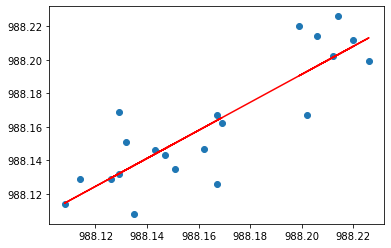

This is the b value [[0.83655979]]
This is the m value [161.50298089]
This is the R^2 0.7395011512205776


In [7]:

one_Through_Twenty = tzDF["measurements_height"].loc[1:21].values.reshape(-1,1)
two_Through_Twenty_One= tzDF["measurements_height"].loc[2:22].values.reshape(-1,1)
three_Through_Twenty_Two =tzDF["measurements_height"].loc[3:23].values.reshape(-1,1)
four_Through_Twenty_Four = tzDF["measurements_height"].loc[4:24].values.reshape(-1,1)

#Linear Regression model on columns 1-20 and 2-21

lm = LinearRegression()
lm.fit(one_Through_Twenty ,two_Through_Twenty_One)
y_pred = lm.predict(one_Through_Twenty)
plt.scatter(one_Through_Twenty,two_Through_Twenty_One)
plt.plot(one_Through_Twenty,y_pred,color="red")
plt.show()

print("This is the b value",lm.coef_,)
print("This is the m value",lm.intercept_)
print("This is the R^2",lm.score(one_Through_Twenty,two_Through_Twenty_One))




From the above model with using the first through twentith column and second through twenty second column we yeild a Coefficent of Correlation (R^2) value of about 0.73 which shows positive correlation between the two inputs. The code snippets below will plot the rest of the displays with the model inputs.

## two_through_Twenty_One and three_through_Twenty_Two

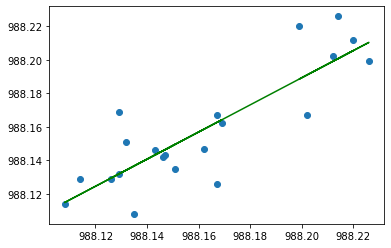

This is the b value [[0.81020583]]
This is the m value [187.5439221]
This is the R^2 0.7256865812125708


In [8]:
lm1 = LinearRegression()
lm1.fit(two_Through_Twenty_One ,three_Through_Twenty_Two)
y_pred1 = lm1.predict(two_Through_Twenty_One)
plt.scatter(two_Through_Twenty_One,three_Through_Twenty_Two)
plt.plot(two_Through_Twenty_One,y_pred1,color="green")
plt.show()
print("This is the b value",lm1.coef_,)
print("This is the m value",lm1.intercept_)
print("This is the R^2",lm1.score(two_Through_Twenty_One,three_Through_Twenty_Two))

From the above model with using the first through twentith column and second through twenty second column we yeild a Coefficent of Correlation (R^2) value of about 0.73 which shows positive correlation between the two inputs. The code snippets below will plot the rest of the displays with the model inputs.

# Multiple Linear Regression

The following code chunk uses Multiple Linear Regression(MLR) specifically with rows of height measurmet one_Through_Twenty,two_Through_Twenty_One, and 
three_Through_Twenty_Two.

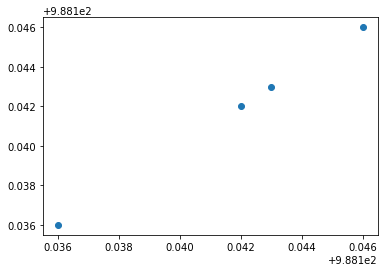

This is the b value [ 0.01941175  0.00288402 -0.01502782  0.01923043  0.0293583   0.01371064
  0.01946735  0.01795902 -0.01988713 -0.01506736  0.00316758  0.03718794
  0.00365534 -0.02615274 -0.03705783 -0.01022212  0.03107098  0.00797899
 -0.00674407 -0.00187173]
This is the m value 915.9507871815277
This is the R^2 1.0


,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
measurements_height,988.206,988.214,988.226,988.199,988.220,988.212,988.202,988.167,988.167,988.126,...,988.132,988.151,988.135,988.108,988.114,988.129,988.169,988.162,988.147,988.143
measurements_height,988.214,988.226,988.199,988.220,988.212,988.202,988.167,988.167,988.126,988.129,...,988.151,988.135,988.108,988.114,988.129,988.169,988.162,988.147,988.143,988.146
measurements_height,988.226,988.199,988.220,988.212,988.202,988.167,988.167,988.126,988.129,988.132,...,988.135,988.108,988.114,988.129,988.169,988.162,988.147,988.143,988.146,988.142
measurements_height,988.199,988.220,988.212,988.202,988.167,988.167,988.126,988.129,988.132,988.151,...,988.108,988.114,988.129,988.169,988.162,988.147,988.143,988.146,988.142,988.136


In [11]:
one_Through_Twenty = tzDF["measurements_height"].loc[1:21]
two_Through_Twenty_One= tzDF["measurements_height"].loc[2:22]
three_Through_Twenty_Two =tzDF["measurements_height"].loc[3:23]
four_Through_Twenty_Four = tzDF["measurements_height"].loc[4:24]

#Column partions
one_Through_Twenty.rename({"measurements_height":"w"},axis =1,inplace=True)
two_Through_Twenty_One.rename({"measurements_height":"x"},axis =1,inplace=True)
three_Through_Twenty_Two.rename({"measurements_height":"y"},axis =1,inplace=True)
four_Through_Twenty_Four.rename({"measurements_height":"z"},axis =1,inplace=True)

#Concating the columns to combine to one dataframe
result_DF = pd.concat([one_Through_Twenty,two_Through_Twenty_One,three_Through_Twenty_Two,four_Through_Twenty_Four],axis=1)


#Fixing the new dataframe created
result_DF.iloc[:,1] = result.iloc[:,1].shift(-1)
result_DF.iloc[:,2] = result.iloc[:,2].shift(-2)
result_DF.iloc[:,3] = result.iloc[:,3].shift(-3)
result_DF = result.dropna()
result_DF = result.transpose()
result_DF

lm = LinearRegression()
x = result_DF.iloc[:,0:20]
y = result_DF.iloc[:,20]
lm.fit(x,y)
y_pred1 = lm.predict(x)
plt.scatter(y,y_pred1)
plt.show()
print("This is the b value",lm.coef_,)
print("This is the m value",lm.intercept_)
print("This is the R^2",lm.score(x,y)) 
result

## Prediction of one point

Error of model is [-0.01270647]


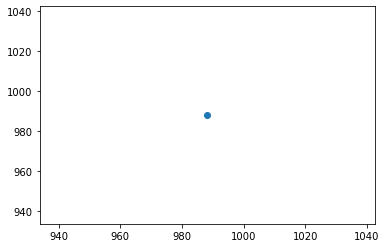

In [16]:
#Training the first through third rows and all columns
train_x = x.iloc[0:3,:]
train_y = y.iloc[0:3]

test_x = x.iloc[3,:]
test_y = y.iloc[3]
test_x = test_x.values.reshape(1,-1)
lm.fit(train_x,train_y)
y_pred2 = lm.predict(test_x)
plt.scatter(test_y,y_pred2)

print("Error of model is",test_y-y_pred2)

Analyze

Method that takes in a dataframe and makes thousand rows for increased sample size

In [18]:
empty_list = []
def make_list(DataFrame):
    i = 0
    for i in range(1000):  
        change = tzDF["measurements_height"].iloc[i+1:i+21].to_frame().transpose()

        change.columns = ["history_1","history_2","history_3","history_4","history_5",
                          "history_6","history_7","history_8","history_9","history_10",
                          "history_11","history_12","history_13","history_14","history_15",
                          "history_16","history_17","history_18","history_19","history_20"]
        change.index = [i]
        empty_list.append(change)
    return empty_list
tzDF_list = make_list(tzDF["measurements_height"])
tzDF_two_list = make_list(tz2DF["measurements_height"])

#List iteration to combine all elements in list
finalDF = pd.concat([m for m in tzDF_list])
finalDF_two =  pd.concat([m for m in tzDF_two_list])
finalDF_two
        

,history_1,history_2,history_3,history_4,history_5,history_6,history_7,history_8,history_9,history_10,history_11,history_12,history_13,history_14,history_15,history_16,history_17,history_18,history_19,history_20
0,988.206,988.214,988.226,988.199,988.220,988.212,988.202,988.167,988.167,988.126,988.129,988.132,988.151,988.135,988.108,988.114,988.129,988.169,988.162,988.147
1,988.214,988.226,988.199,988.220,988.212,988.202,988.167,988.167,988.126,988.129,988.132,988.151,988.135,988.108,988.114,988.129,988.169,988.162,988.147,988.143
2,988.226,988.199,988.220,988.212,988.202,988.167,988.167,988.126,988.129,988.132,988.151,988.135,988.108,988.114,988.129,988.169,988.162,988.147,988.143,988.146
3,988.199,988.220,988.212,988.202,988.167,988.167,988.126,988.129,988.132,988.151,988.135,988.108,988.114,988.129,988.169,988.162,988.147,988.143,988.146,988.142
4,988.220,988.212,988.202,988.167,988.167,988.126,988.129,988.132,988.151,988.135,988.108,988.114,988.129,988.169,988.162,988.147,988.143,988.146,988.142,988.136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,988.100,988.106,988.131,988.121,988.129,988.129,988.146,988.148,988.131,988.130,988.145,988.112,988.127,988.140,988.114,988.122,988.151,988.164,988.140,988.143
996,988.106,988.131,988.121,988.129,988.129,988.146,988.148,988.131,988.130,988.145,988.112,988.127,988.140,988.114,988.122,988.151,988.164,988.140,988.143,988.146
997,988.131,988.121,988.129,988.129,988.146,988.148,988.131,988.130,988.145,988.112,988.127,988.140,988.114,988.122,988.151,988.164,988.140,988.143,988.146,988.132
998,988.121,988.129,988.129,988.146,988.148,988.131,988.130,988.145,988.112,988.127,988.140,988.114,988.122,988.151,988.164,988.140,988.143,988.146,988.132,988.133


# 35% Test Data demensration

In [ ]:

w = finalDF.iloc[:,0:19]
z = finalDF.iloc[:,19]

lm.fit(w,z)
y_pred1 = lm.predict(w)
plt.scatter(z,y_pred1)
# x axis is actual height and y is what lm model is predicting in scatter 
X_train, X_test, y_train, y_test = train_test_split(w, z, test_size=0.35,random_state=50)

lm = LinearRegression()

model = lm.fit(X_train,y_train)
prediction = lm.predict(X_test)
print(y_test-prediction)
print(np.corrcoef(y_test,prediction))


# 55% Test Data demenstration

565   -0.006137
223    0.003267
581   -0.007901
959   -0.002990
974    0.003694
         ...   
876    0.003388
554   -0.006918
720   -0.007705
473    0.007467
826   -0.000659
Name: history_20, Length: 1100, dtype: float64
[[1.         0.83930277]
 [0.83930277 1.        ]]


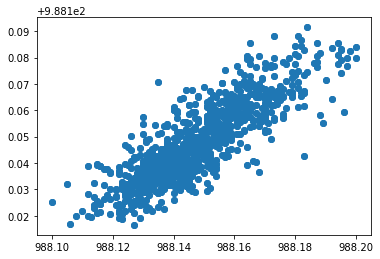

In [19]:
h = finalDF.iloc[:,0:19]
i = finalDF.iloc[:,19]

lm.fit(h,i)
y_pred1 = lm.predict(h)
plt.scatter(i,y_pred1)

X_train, X_test, y_train, y_test = train_test_split(h, i, test_size=0.55,random_state=50)

lm = LinearRegression()

model = lm.fit(X_train,y_train)
prediction = lm.predict(X_test)
print(y_test-prediction)
print(np.corrcoef(y_test,prediction))

# 75% Test Data demenstration

565   -0.007793
223    0.004301
581   -0.006390
959   -0.001682
974    0.003250
         ...   
797   -0.013820
607    0.007500
315   -0.004192
513   -0.000566
934    0.013100
Name: history_20, Length: 1500, dtype: float64
[[1.         0.83262424]
 [0.83262424 1.        ]]


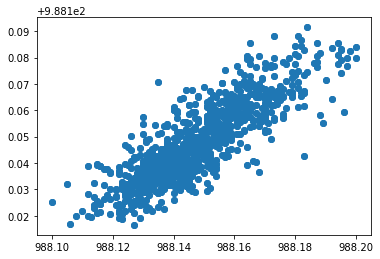

In [20]:

from sklearn.model_selection import train_test_split
#
m = finalDF.iloc[:,0:19]
n = finalDF.iloc[:,19]

lm.fit(m,n)
y_pred1 = lm.predict(m)
plt.scatter(n,y_pred1)

X_train, X_test, y_train, y_test = train_test_split(m, n, test_size=0.75,random_state=50)

lm = LinearRegression()

model = lm.fit(X_train,y_train)
prediction = lm.predict(X_test)
print(y_test-prediction)
print(np.corrcoef(y_test,prediction))




# Prediction from 20%

In [ ]:

from sklearn.model_selection import train_test_split
# o & p correspond to the 17th
m = finalDF.iloc[:,0:19]
n = finalDF.iloc[:,19]
l = finalDF_two.iloc[:,0:19]
z = finalDF_two.iloc[:,19]

lm.fit(m,n)
y_pred1 = lm.predict(m)
#plt.scatter(n,y_pred1)

X_train, X_test, y_train, y_test = train_test_split(m, n, test_size=0.20,random_state=50)
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_


#ht = model.intercept_ + model.coef_ * 
#ht
#model.predict(l)[0]

model.predict(l)[0] - z

 

x = model.predict(l)
#plt.scatter(x,z,color="black")
#Distrubution of Errors pred vs actual
plt.hist(x-z,bins = 50)
plt.xlabel("meters")
plt.ylabel("distrubution")
plt.show()
print(model.predict(l)[0] - z)





# Prediction from 30%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(m, n, test_size=0.30,random_state=50)
third_pred_x = finalDF_two.iloc[:,0:19]
third_pred_y = finalDF_two.iloc[:,19]
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_


model.predict(third_pred_x)
model.predict(third_pred_x) - tz2DF["measurements_height"][0]
model.predict(third_pred_x)[0] - third_pred_y

x = model.predict(third_pred_x)
#plt.scatter(x,z,color="black")
#Distrubution of Errors pred vs actual
plt.hist(x-third_pred_y,bins = 50)
plt.show()



# Prediction from 40%

In [21]:
X_train, X_test, y_train, y_test = train_test_split(m, n, test_size=0.40,random_state=50)
fourth_pred_x = finalDF_two.iloc[:,0:19]
fourth_pred_y = finalDF_two.iloc[:,19]
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_


model.predict(fourth_pred_x)

#model.predict(fourth_pred_x)[0] - 
x = model.predict(fourth_pred_x)
plt.scatter(x,z,color="black")
#Distrubution of Errors pred vs actual
#plt.hist(x-fourth_pred_y,bins = 50)
plt.show()


NameError: name 'z' is not defined

# Prediction from 50%

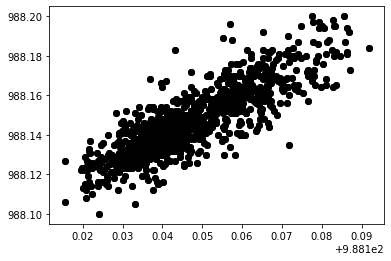

In [22]:
X_train, X_test, y_train, y_test = train_test_split(m, n, test_size=0.50,random_state=50)
fifth_pred_x = finalDF_two.iloc[:,0:19]
fifth_pred_y = finalDF_two.iloc[:,19]
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_


model.predict(fifth_pred_x)
#model.predict(fifth_pred_x)[0] - tz2DF["measurements_height"][0]

x = model.predict(fifth_pred_x)
plt.scatter(x,fifth_pred_y,color="black")
#Distrubution of Errors pred vs actual
#plt.hist(x-fifth_pred_y,bins = 50)
plt.show()


# Prediction from 60%

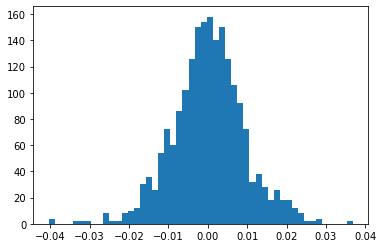

In [23]:
X_train, X_test, y_train, y_test = train_test_split(m, n, test_size=0.60,random_state=50)
sixth_pred_x = finalDF_two.iloc[:,0:19]
sixth_pred_y = finalDF_two.iloc[:,19]
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_


model.predict(sixth_pred_x)
model.predict(sixth_pred_x)[0] - tz2DF["measurements_height"][0]

x = model.predict(sixth_pred_x)
#plt.scatter(x,z,color="black")
#Distrubution of Errors pred vs actual
plt.hist(x-sixth_pred_y,bins = 50)
plt.show()



# Prediciton from 70%

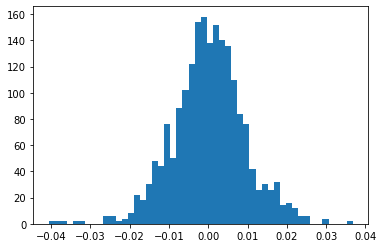

In [24]:
X_train, X_test, y_train, y_test = train_test_split(m, n, test_size=0.70,random_state=50)
seventh_pred_x = finalDF_two.iloc[:,0:19]
seventh_pred_y = finalDF_two.iloc[:,19]
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_


model.predict(seventh_pred_x)
model.predict(seventh_pred_x)[0] - tz2DF["measurements_height"][0]

x = model.predict(seventh_pred_x)
#plt.scatter(x,z,color="black")
#Distrubution of Errors pred vs actual
plt.hist(x-seventh_pred_y,bins = 50)
plt.show()


# Prediciton from 80%

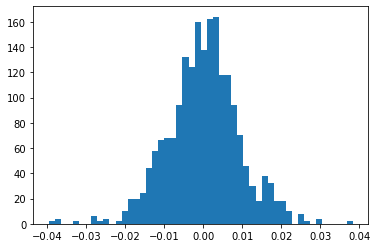

In [25]:
X_train, X_test, y_train, y_test = train_test_split(m, n, test_size=0.80,random_state=50)
eigth_pred_x = finalDF_two.iloc[:,0:19]
eigth_pred_y = finalDF_two.iloc[:,19]
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_
model = lm.fit(X_train,y_train)
model.intercept_
model.coef_


model.predict(eigth_pred_x)
model.predict(eigth_pred_x)[0] - tz2DF["measurements_height"][0]

x = model.predict(eigth_pred_x)
#plt.scatter(x,z,color="black")
#Distrubution of Errors pred vs actual
plt.hist(x-eigth_pred_y,bins = 50)
plt.show()


# References
List relevant references:
